# 0.0 Imports

In [54]:
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt

from IPython.core.display import HTML

# Tranformations
from sklearn.preprocessing import StandardScaler as ss


# Training 
from sklearn.svm import SVC




## 0.1 Help Functions

In [55]:
 def jupyter_settings():
    %matplotlib inline
    %pylab inline
    
    plt.style.use( 'bmh' )
    plt.rcParams['figure.figsize'] = [25, 12]
    plt.rcParams['font.size'] = 24
    
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    
    sns.set()

jupyter_settings() 

%pylab is deprecated, use %matplotlib inline and import the required libraries.
Populating the interactive namespace from numpy and matplotlib


## 0.2 Loading Data

In [56]:
df_waw = pd.read_csv('/Users/franciscocaetano/Documents/Data Science/telco_predict_churn/telco_churn/data/raw/telco_Churn.csv')

# 1.0 Data Description

In [57]:
df1 = df_waw.copy()

# 1.1 Data Dimensions

In [58]:
print('Nr of rows: {}\nNumber of cols: {}'.format(df1.shape[0], df1.shape[1]))

Nr of rows: 3333
Number of cols: 21


# 1.2 Data types

In [59]:
df_waw.head()

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,State,Area_Code,Phone
0,128,25,265.1,197.4,244.7,10.0,1,no,no,yes,110,45.07,99,16.78,91,11.01,3,2.70,KS,415,382-4657
1,107,26,161.6,195.5,254.4,13.7,1,no,no,yes,123,27.47,103,16.62,103,11.45,3,3.70,OH,415,371-7191
2,137,0,243.4,121.2,162.6,12.2,0,no,no,no,114,41.38,110,10.30,104,7.32,5,3.29,NJ,415,358-1921
3,84,0,299.4,61.9,196.9,6.6,2,no,yes,no,71,50.90,88,5.26,89,8.86,7,1.78,OH,408,375-9999
4,75,0,166.7,148.3,186.9,10.1,3,no,yes,no,113,28.34,122,12.61,121,8.41,3,2.73,OK,415,330-6626


In [60]:
df1.Area_Code.value_counts( normalize= True)

415    0.496550
510    0.252025
408    0.251425
Name: Area_Code, dtype: float64

In [61]:
df1.dtypes

Account_Length      int64
Vmail_Message       int64
Day_Mins          float64
Eve_Mins          float64
Night_Mins        float64
Intl_Mins         float64
CustServ_Calls      int64
Churn              object
Intl_Plan          object
Vmail_Plan         object
Day_Calls           int64
Day_Charge        float64
Eve_Calls           int64
Eve_Charge        float64
Night_Calls         int64
Night_Charge      float64
Intl_Calls          int64
Intl_Charge       float64
State              object
Area_Code           int64
Phone              object
dtype: object

# 1.3 Check nas

In [62]:
df1.isna().sum()

Account_Length    0
Vmail_Message     0
Day_Mins          0
Eve_Mins          0
Night_Mins        0
Intl_Mins         0
CustServ_Calls    0
Churn             0
Intl_Plan         0
Vmail_Plan        0
Day_Calls         0
Day_Charge        0
Eve_Calls         0
Eve_Charge        0
Night_Calls       0
Night_Charge      0
Intl_Calls        0
Intl_Charge       0
State             0
Area_Code         0
Phone             0
dtype: int64

# 1.4 Descreptive Data

In [63]:
num_attrib = df1.select_dtypes(include = ['float64','int64'])
cat_attrib = df1.select_dtypes(exclude=['float64','int64'])

Central tendency and dispersion

In [64]:
##

mean_ = pd.DataFrame(num_attrib.apply(np.mean)).T
median_ = pd.DataFrame(num_attrib.apply(np.median)).T

##

std_ = pd.DataFrame(num_attrib.apply(np.std)).T
min_ = pd.DataFrame(num_attrib.apply(min)).T
max_ = pd.DataFrame(num_attrib.apply(max)).T
range_ = pd.DataFrame(num_attrib.apply(lambda x: x.max() - x.min())).T
skew_ = pd.DataFrame(num_attrib.apply(lambda x: x.skew())).T
kurtosis_ = pd.DataFrame(num_attrib.apply(lambda x: x.kurtosis())).T

# concat

m = pd.concat([min_, max_, range_, mean_, median_, std_, skew_,kurtosis_]).T.reset_index()
m.columns = ['Att', 'min', 'max', 'range','mean', 'median', 'std','skew', 'kurtosis']
m

,Att,min,max,range,mean,median,std,skew,kurtosis
0,Account_Length,1.00,243.00,242.00,101.064806,101.00,39.816132,0.096606,-0.107836
1,Vmail_Message,0.00,51.00,51.00,8.099010,0.00,13.686312,1.264824,-0.051129
2,Day_Mins,0.00,350.80,350.80,179.775098,179.40,54.459218,-0.029077,-0.019940
3,Eve_Mins,0.00,363.70,363.70,200.980348,201.40,50.706236,-0.023877,0.025630
4,Night_Mins,23.20,395.00,371.80,200.872037,201.20,50.566260,0.008921,0.085816
5,Intl_Mins,0.00,20.00,20.00,10.237294,10.30,2.791421,-0.245136,0.609185
6,CustServ_Calls,0.00,9.00,9.00,1.562856,1.00,1.315294,1.091359,1.730914
7,Day_Calls,0.00,165.00,165.00,100.435644,101.00,20.066073,-0.111787,0.243182
8,Day_Charge,0.00,59.64,59.64,30.562307,30.50,9.258045,-0.029083,-0.019812
9,Eve_Calls,0.00,170.00,170.00,100.114311,100.00,19.919636,-0.055563,0.206156


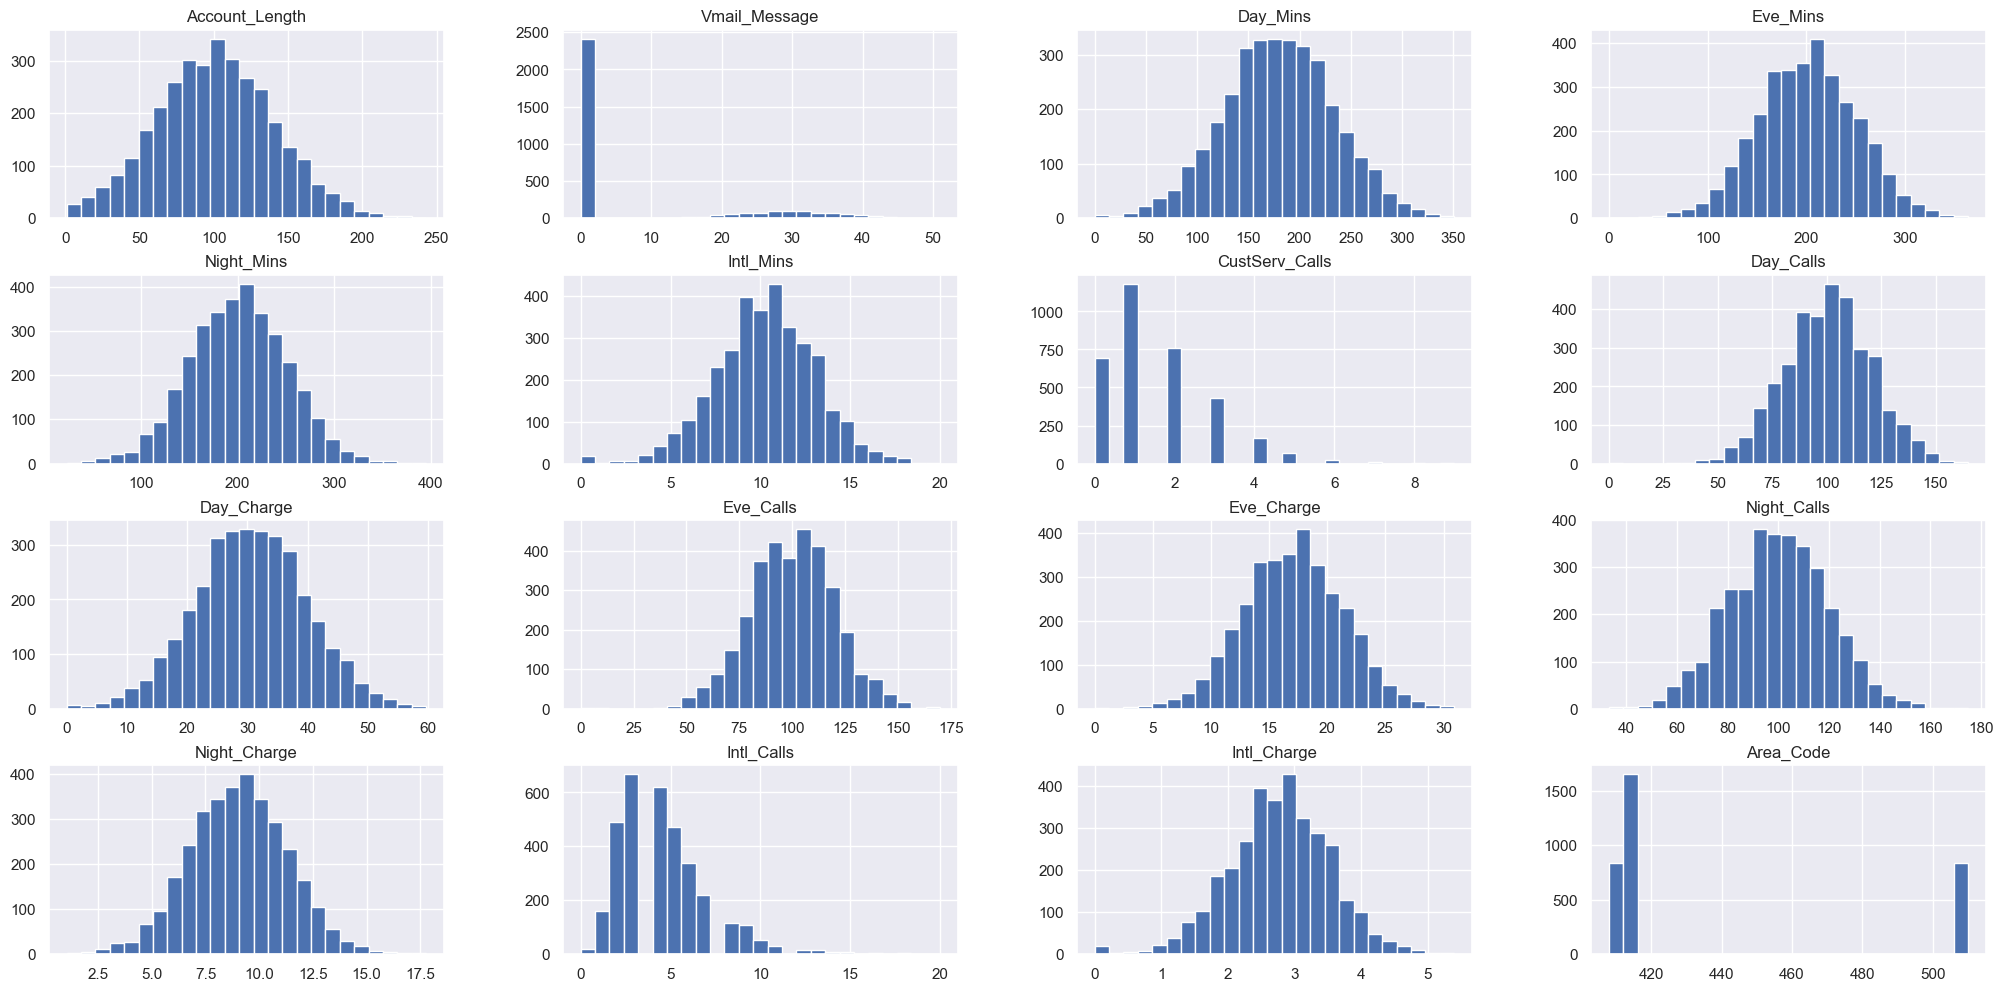

In [65]:
num_attrib.hist( bins = 25);

In [102]:
cat_attrib.columns

Index(['Churn', 'Intl_Plan', 'Vmail_Plan', 'State', 'Phone'], dtype='object')

In [51]:
df1.columns.tolist()

standartization = ['Account_Length',
                    'Vmail_Message',
                    'Day_Mins',
                    'Eve_Mins',
                    'Night_Mins',
                    'Intl_Mins',
                    'Intl_Plan',
                    'Vmail_Plan',
                    'Day_Calls',
                    'Day_Charge',
                    'Eve_Calls',
                    'Eve_Charge',
                    'Night_Calls',
                    'Night_Charge',
                    'Intl_Charge',
                    'State',
                    'Area_Code',
                    'Phone']

rescaling = ['CustServ_Calls', 'Intl_Calls']

encoder  = ['Churn', 'Intl_Plan', 'Vmail_Plan']



['Account_Length',
 'Vmail_Message',
 'Day_Mins',
 'Eve_Mins',
 'Night_Mins',
 'Intl_Mins',
 'CustServ_Calls',
 'Churn',
 'Intl_Plan',
 'Vmail_Plan',
 'Day_Calls',
 'Day_Charge',
 'Eve_Calls',
 'Eve_Charge',
 'Night_Calls',
 'Night_Charge',
 'Intl_Calls',
 'Intl_Charge',
 'State',
 'Area_Code',
 'Phone']

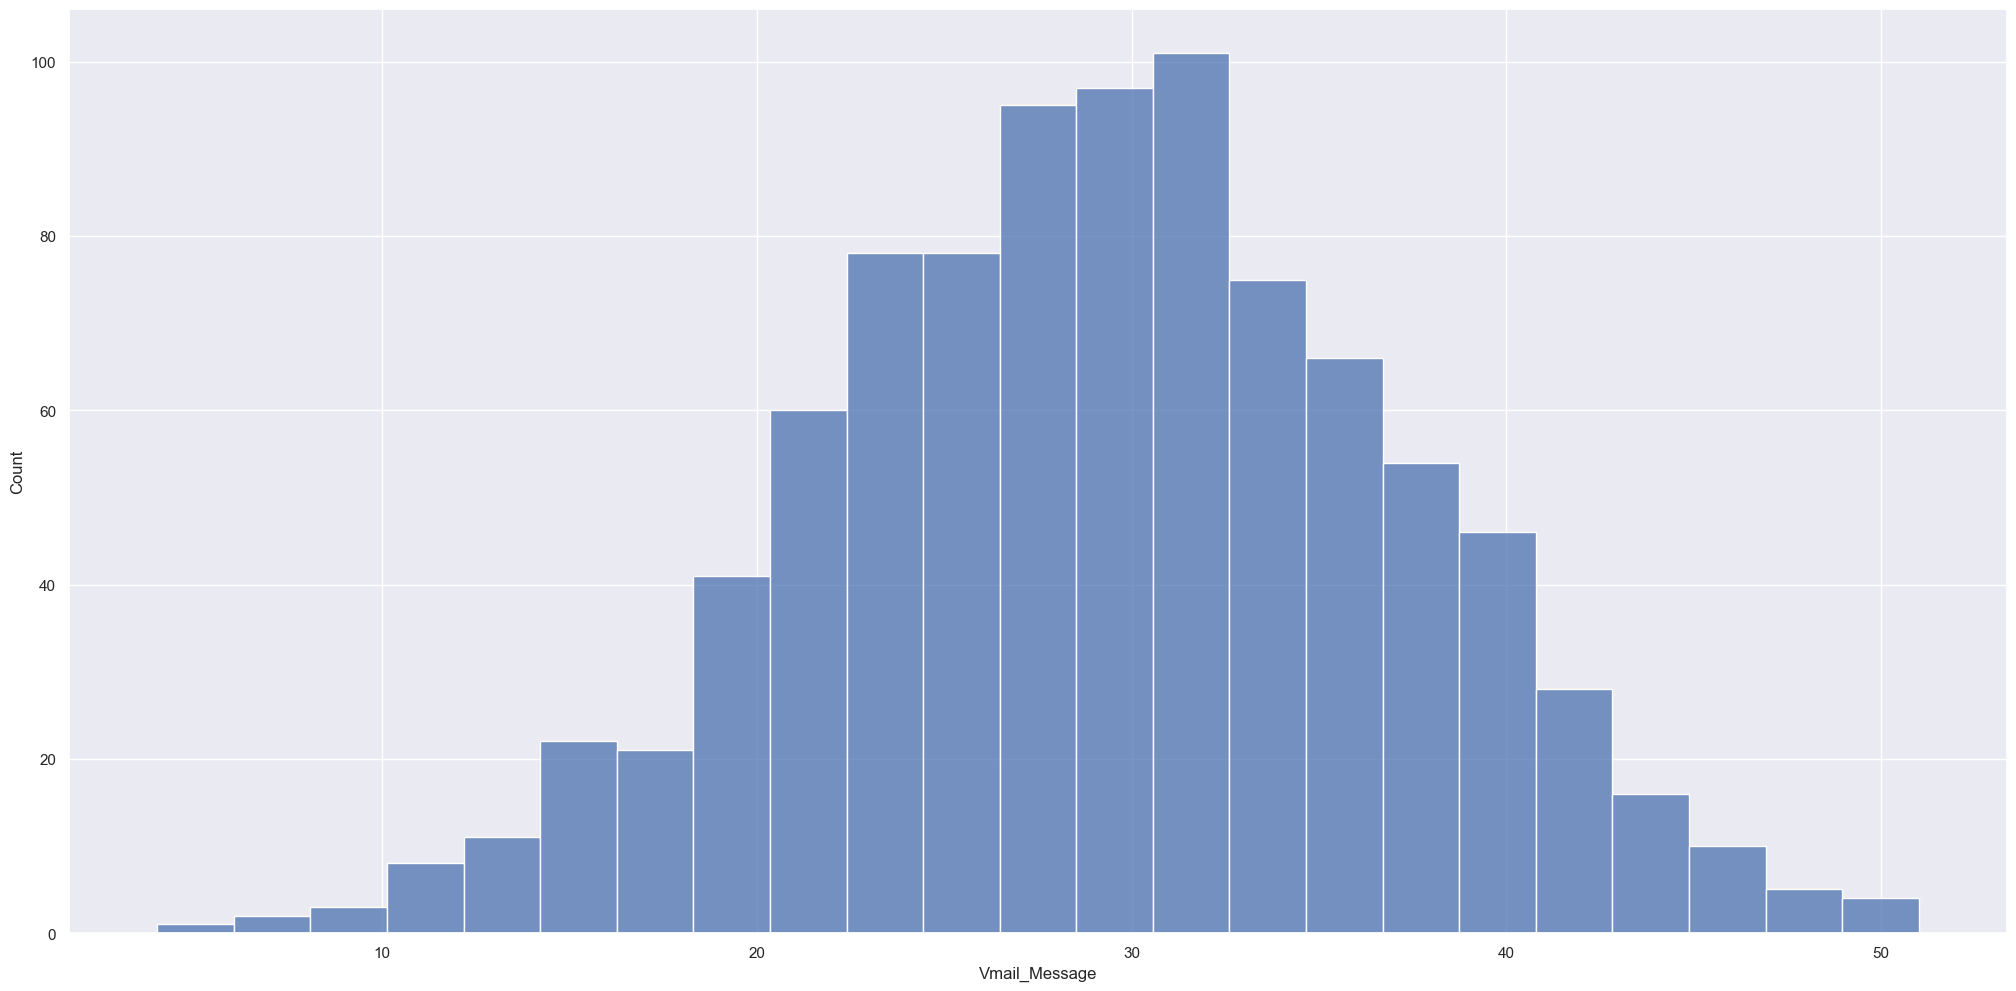

In [70]:
# filtering values 
aux =  df1[df1['Vmail_Message']>0]
sns.histplot(x = aux['Vmail_Message'], data = aux);


# 2.0 EDA

In [75]:
df2 = df1.copy()

In [96]:
df2.groupby(['Churn']).sum()

/var/folders/q6/zrgkgk0n1bq299dy6f_z2yvm0000gn/T/ipykernel_66271/3886719473.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df2.groupby(['Churn']).sum()


,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,Area_Code
Churn,,,,,,,,,,,,,,,,
no,287262,24523,499250.9,567273.4,570379.6,28952.8,4132,285807,84874.20,285110,48218.89,285166,25667.31,12919,7818.70,1245663
yes,49587,2471,99939.5,102594.1,99126.9,5168.1,1077,48945,16989.97,48571,8720.55,48493,4460.76,2011,1395.65,211466


<Axes: xlabel='Night_Charge', ylabel='CustServ_Calls'>

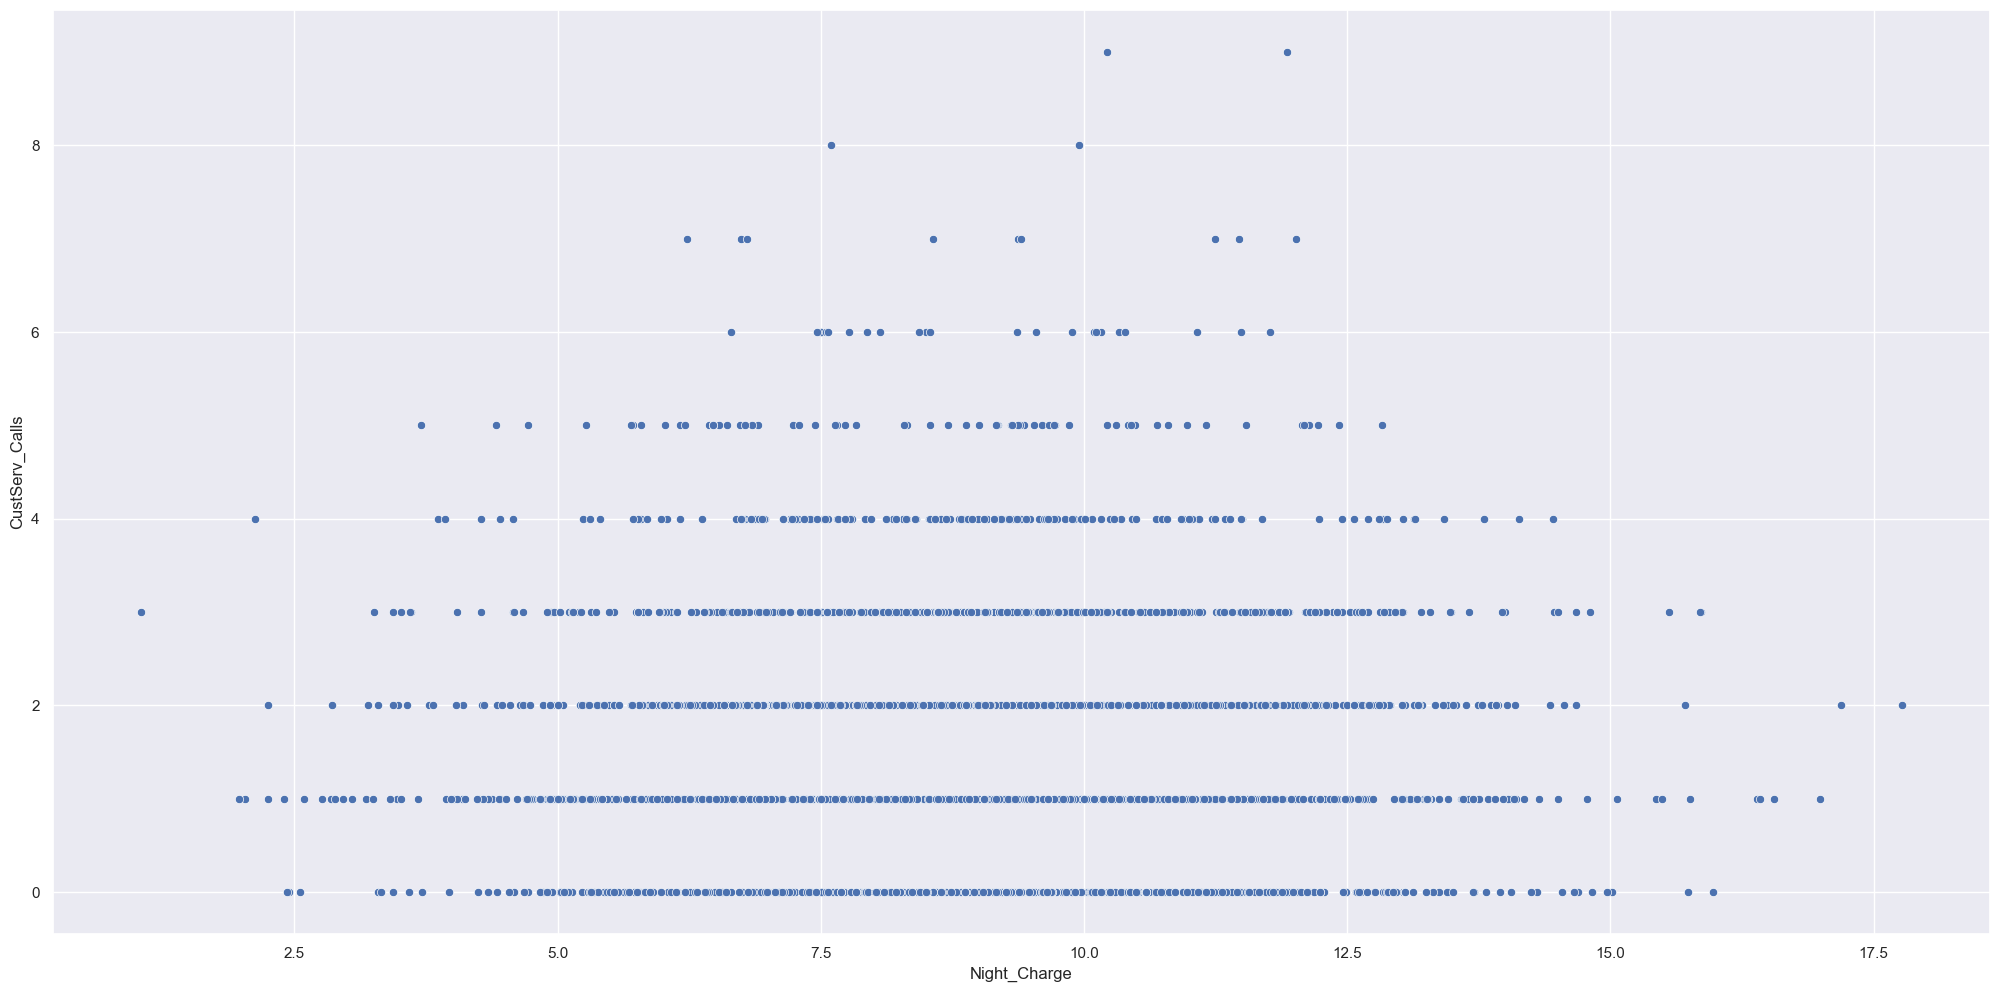

In [86]:
sns.scatterplot(x = 'Night_Charge', y = 'CustServ_Calls', data = df1 )

<Axes: xlabel='State', ylabel='Vmail_Message'>

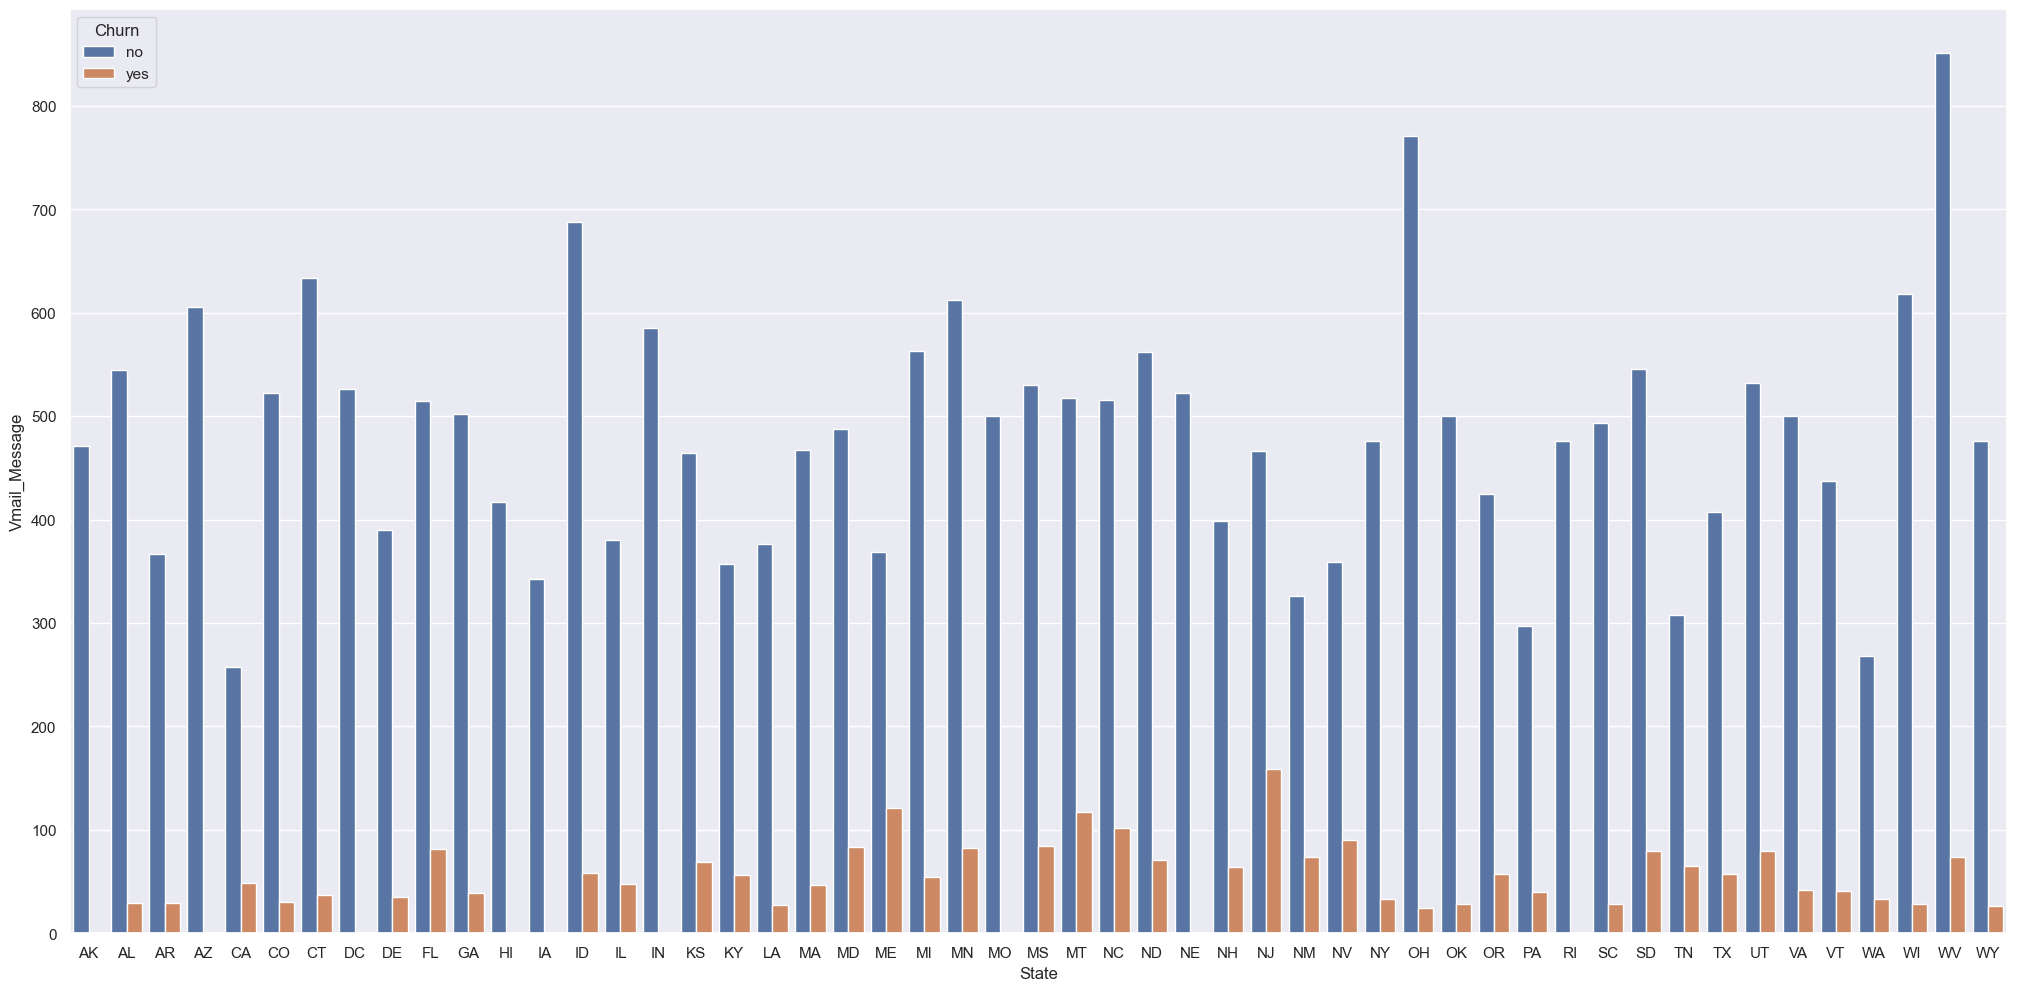

In [87]:
aux = df1[['Churn','Vmail_Message', 'State']].groupby(['Churn', 'State']).sum().reset_index()
sns.barplot(x = 'State', y = 'Vmail_Message', hue = 'Churn', data =aux)


<Axes: xlabel='Churn', ylabel='Vmail_Message'>

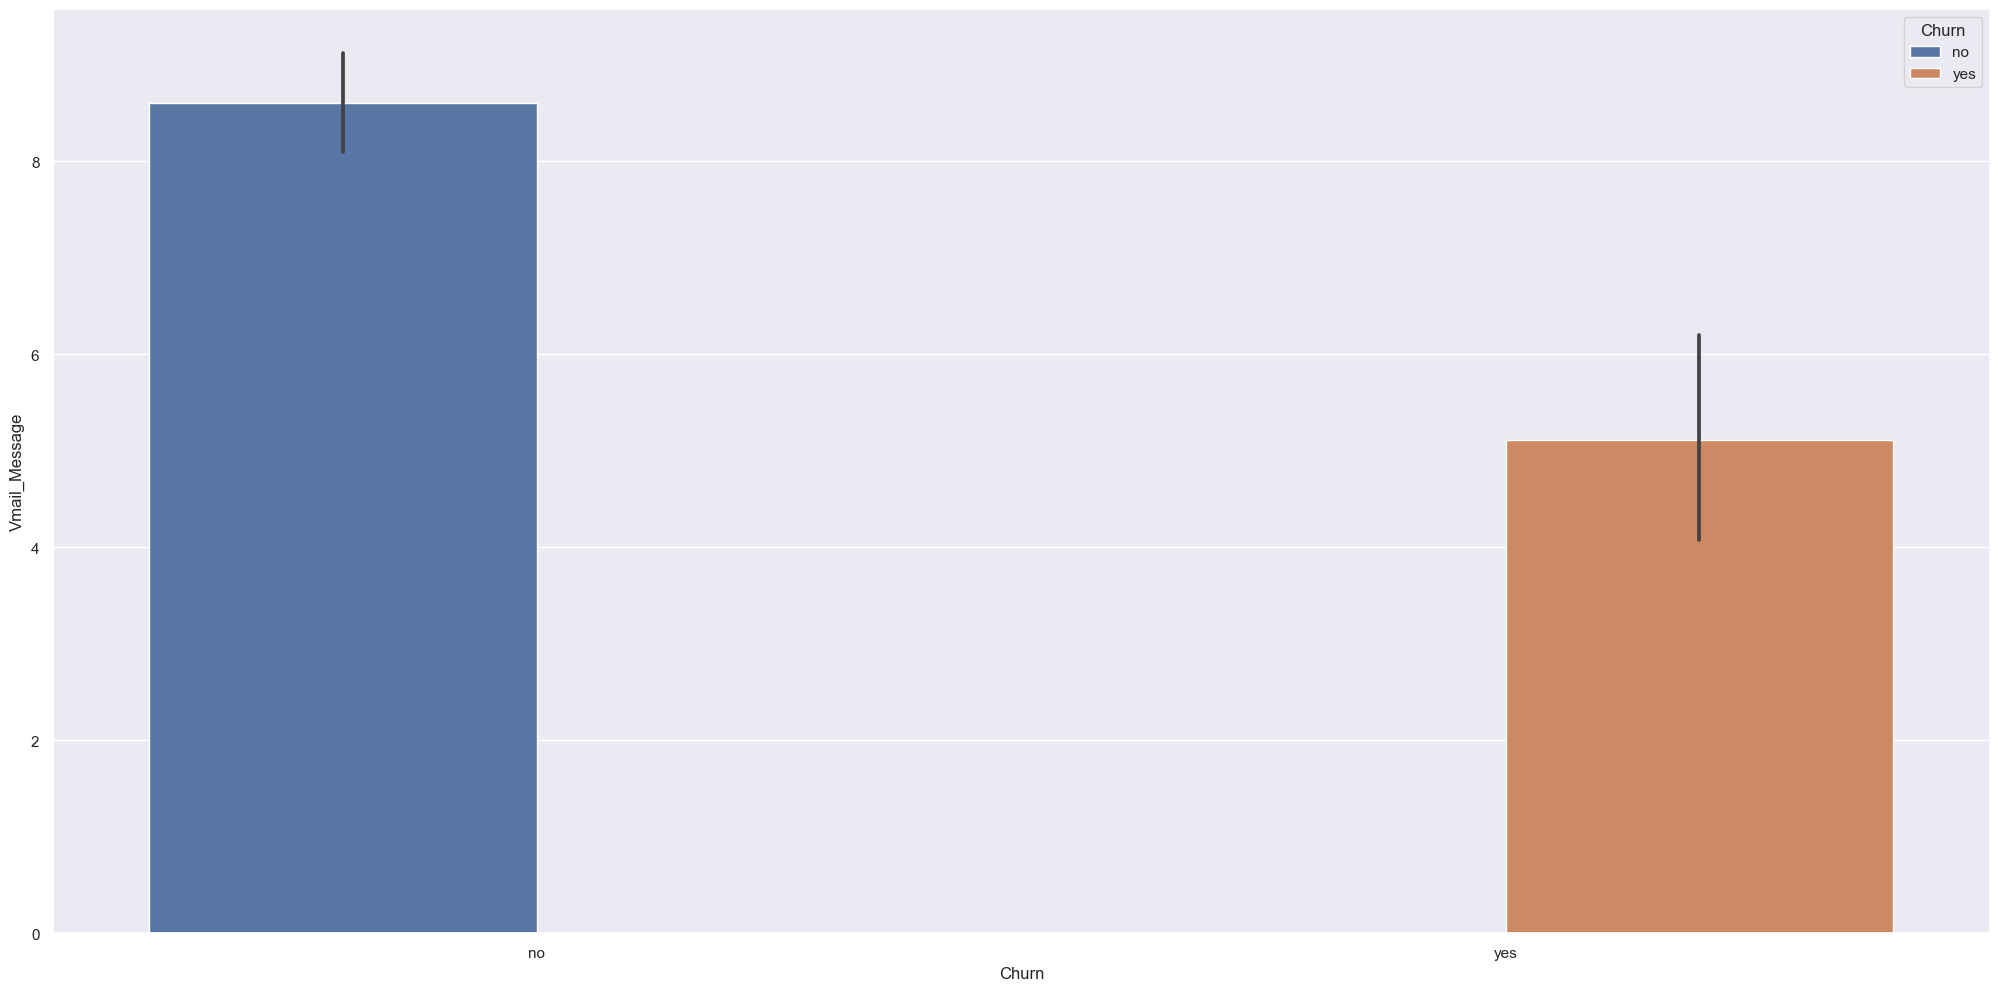

<Axes: xlabel='Churn', ylabel='Intl_Charge'>

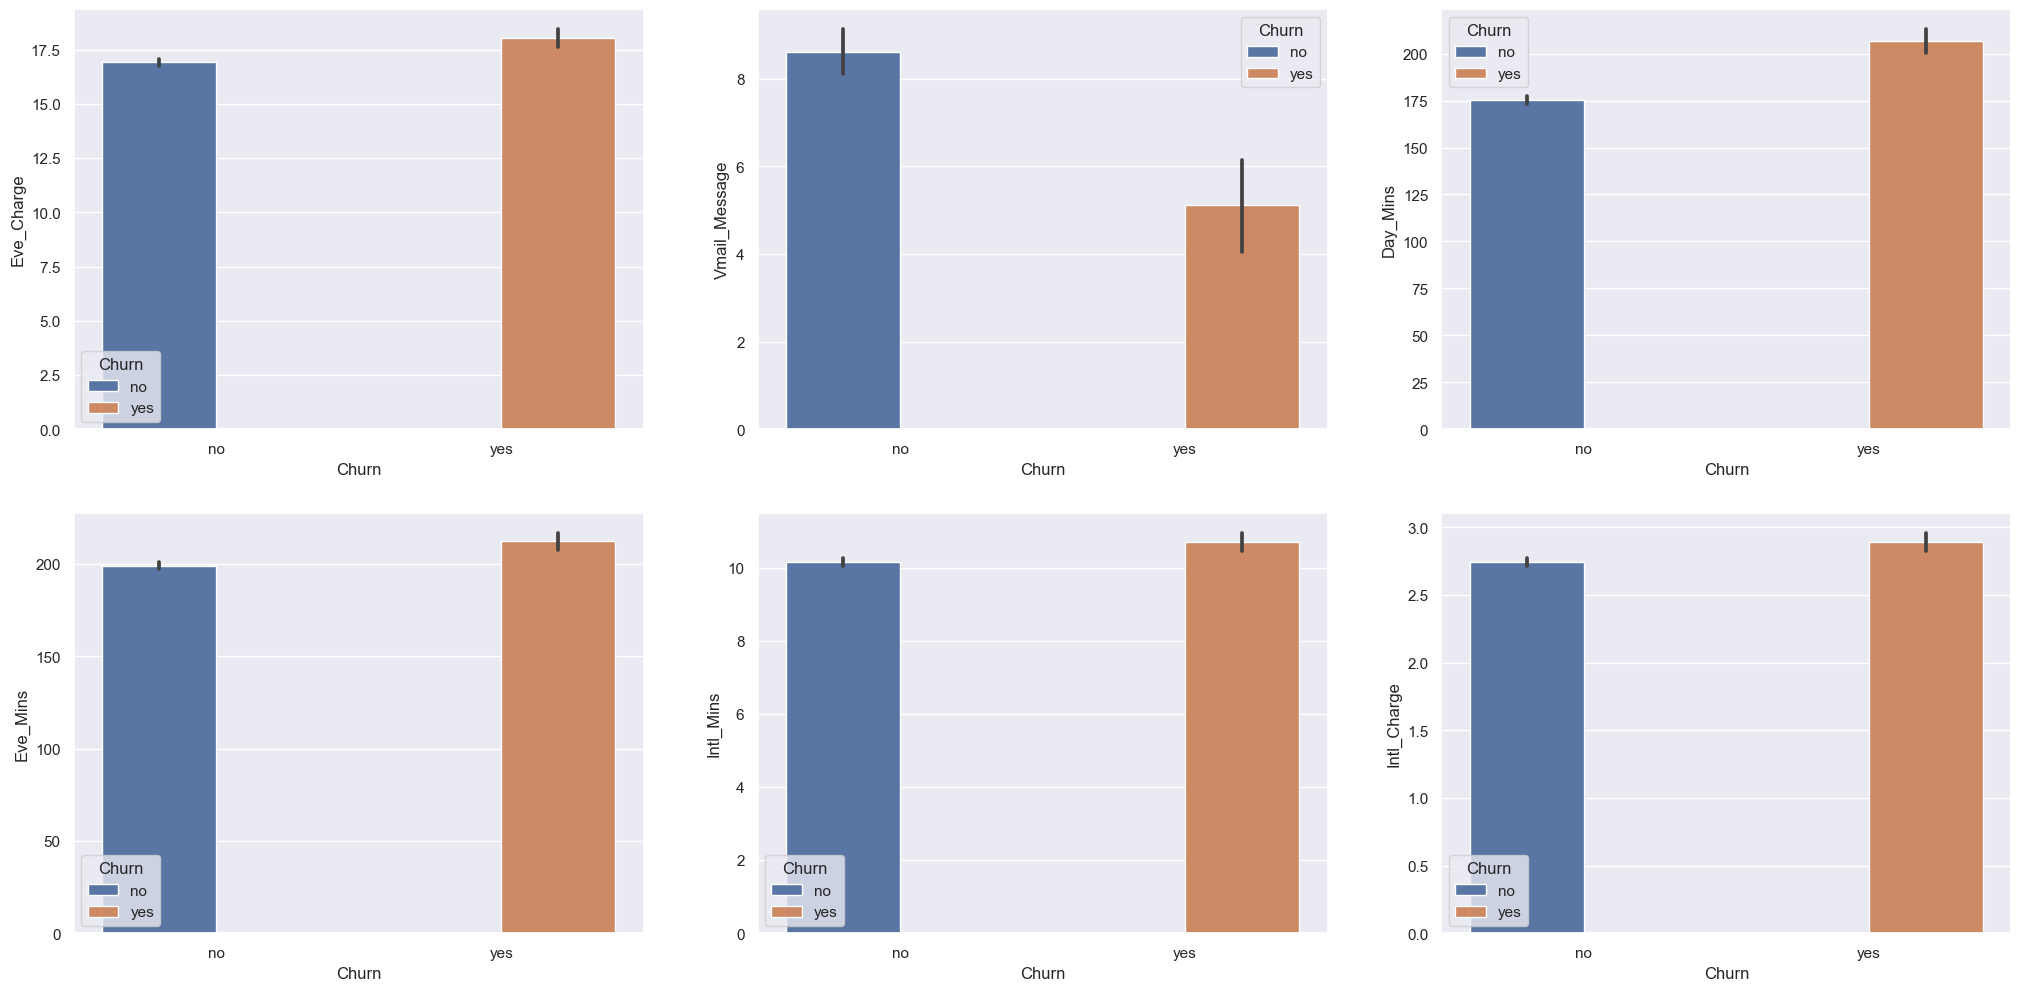

In [104]:
# ploting Variables
plt.subplot(2,3,1)
sns.barplot(x = 'Churn', y = 'Eve_Charge', hue = 'Churn', data =df1)
plt.subplot(2,3,2)
sns.barplot(x = 'Churn', y = 'Vmail_Message', hue = 'Churn', data =df1)
plt.subplot(2,3,3)
sns.barplot(x = 'Churn', y = 'Day_Mins', hue = 'Churn', data =df1)
plt.subplot(2,3,4)
sns.barplot( x= 'Churn', y = 'Eve_Mins', hue = 'Churn', data = df1)
plt.subplot(2,3,5)
sns.barplot( x= 'Churn', y = 'Intl_Mins', hue = 'Churn', data = df1)
plt.subplot(2,3,6)
sns.barplot( x= 'Churn', y = 'Intl_Charge', hue = 'Churn', data = df1)


In [115]:
aux = df2.groupby(['Vmail_Plan']).sum().reset_index()
aux

# sns.barplot(x = 'State', y = 'Vmail_Message', hue = 'Churn', data =aux)
#sns.boxplot(aux)


/var/folders/q6/zrgkgk0n1bq299dy6f_z2yvm0000gn/T/ipykernel_66271/1718796638.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  aux = df2.groupby(['Vmail_Plan']).sum().reset_index()


,Vmail_Plan,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,Area_Code
0,no,243494,0,433574.5,482934.8,483844.2,24687.6,3803,242482,73708.99,241567,41049.88,240906,21773.24,10772,6666.84,1054094
1,yes,93355,26994,165615.9,186932.7,185662.3,9433.3,1406,92270,28155.18,92114,15889.56,92753,8354.83,4158,2547.51,403035


# 3.0 Data Preparation

In [99]:
df3 = df2.copy()

In [100]:
telco_featues =df3.drop(columns='Churn' )
telco_target =df3['Churn']

## 3.1 Data transformation

In [ ]:
['Account_Length',
 'Vmail_Message',
 'Day_Mins',
 'Eve_Mins',
 'Night_Mins',
 'Intl_Mins',
 'CustServ_Calls',
 'Churn',
 'Intl_Plan',
 'Vmail_Plan',
 'Day_Calls',
 'Day_Charge',
 'Eve_Calls',
 'Eve_Charge',
 'Night_Calls',
 'Night_Charge',
 'Intl_Calls',
 'Intl_Charge',
 'State',
 'Area_Code',
 'Phone']

In [101]:
telco_featues.head()

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Intl_Plan,Vmail_Plan,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,State,Area_Code,Phone
0,128,25,265.1,197.4,244.7,10.0,1,no,yes,110,45.07,99,16.78,91,11.01,3,2.70,KS,415,382-4657
1,107,26,161.6,195.5,254.4,13.7,1,no,yes,123,27.47,103,16.62,103,11.45,3,3.70,OH,415,371-7191
2,137,0,243.4,121.2,162.6,12.2,0,no,no,114,41.38,110,10.30,104,7.32,5,3.29,NJ,415,358-1921
3,84,0,299.4,61.9,196.9,6.6,2,yes,no,71,50.90,88,5.26,89,8.86,7,1.78,OH,408,375-9999
4,75,0,166.7,148.3,186.9,10.1,3,yes,no,113,28.34,122,12.61,121,8.41,3,2.73,OK,415,330-6626


# 4. Feature engineetring

In [ ]:
df1['Avg_Night_Calls'] = avg_night_call
df1['Avg_Night_Calls'].head()

In [ ]:
df1 = df1.drop(df1[['Phone', 'Area_Code']], axis = 1)

In [ ]:
df1.head()

,Account_Length,Vmail_Message,Day_Mins,Eve_Mins,Night_Mins,Intl_Mins,CustServ_Calls,Churn,Intl_Plan,Vmail_Plan,Day_Calls,Day_Charge,Eve_Calls,Eve_Charge,Night_Calls,Night_Charge,Intl_Calls,Intl_Charge,State
0,128,25,265.1,197.4,244.7,10.0,1,no,no,yes,110,45.07,99,16.78,91,11.01,3,2.70,KS
1,107,26,161.6,195.5,254.4,13.7,1,no,no,yes,123,27.47,103,16.62,103,11.45,3,3.70,OH
2,137,0,243.4,121.2,162.6,12.2,0,no,no,no,114,41.38,110,10.30,104,7.32,5,3.29,NJ
3,84,0,299.4,61.9,196.9,6.6,2,no,yes,no,71,50.90,88,5.26,89,8.86,7,1.78,OH
4,75,0,166.7,148.3,186.9,10.1,3,no,yes,no,113,28.34,122,12.61,121,8.41,3,2.73,OK


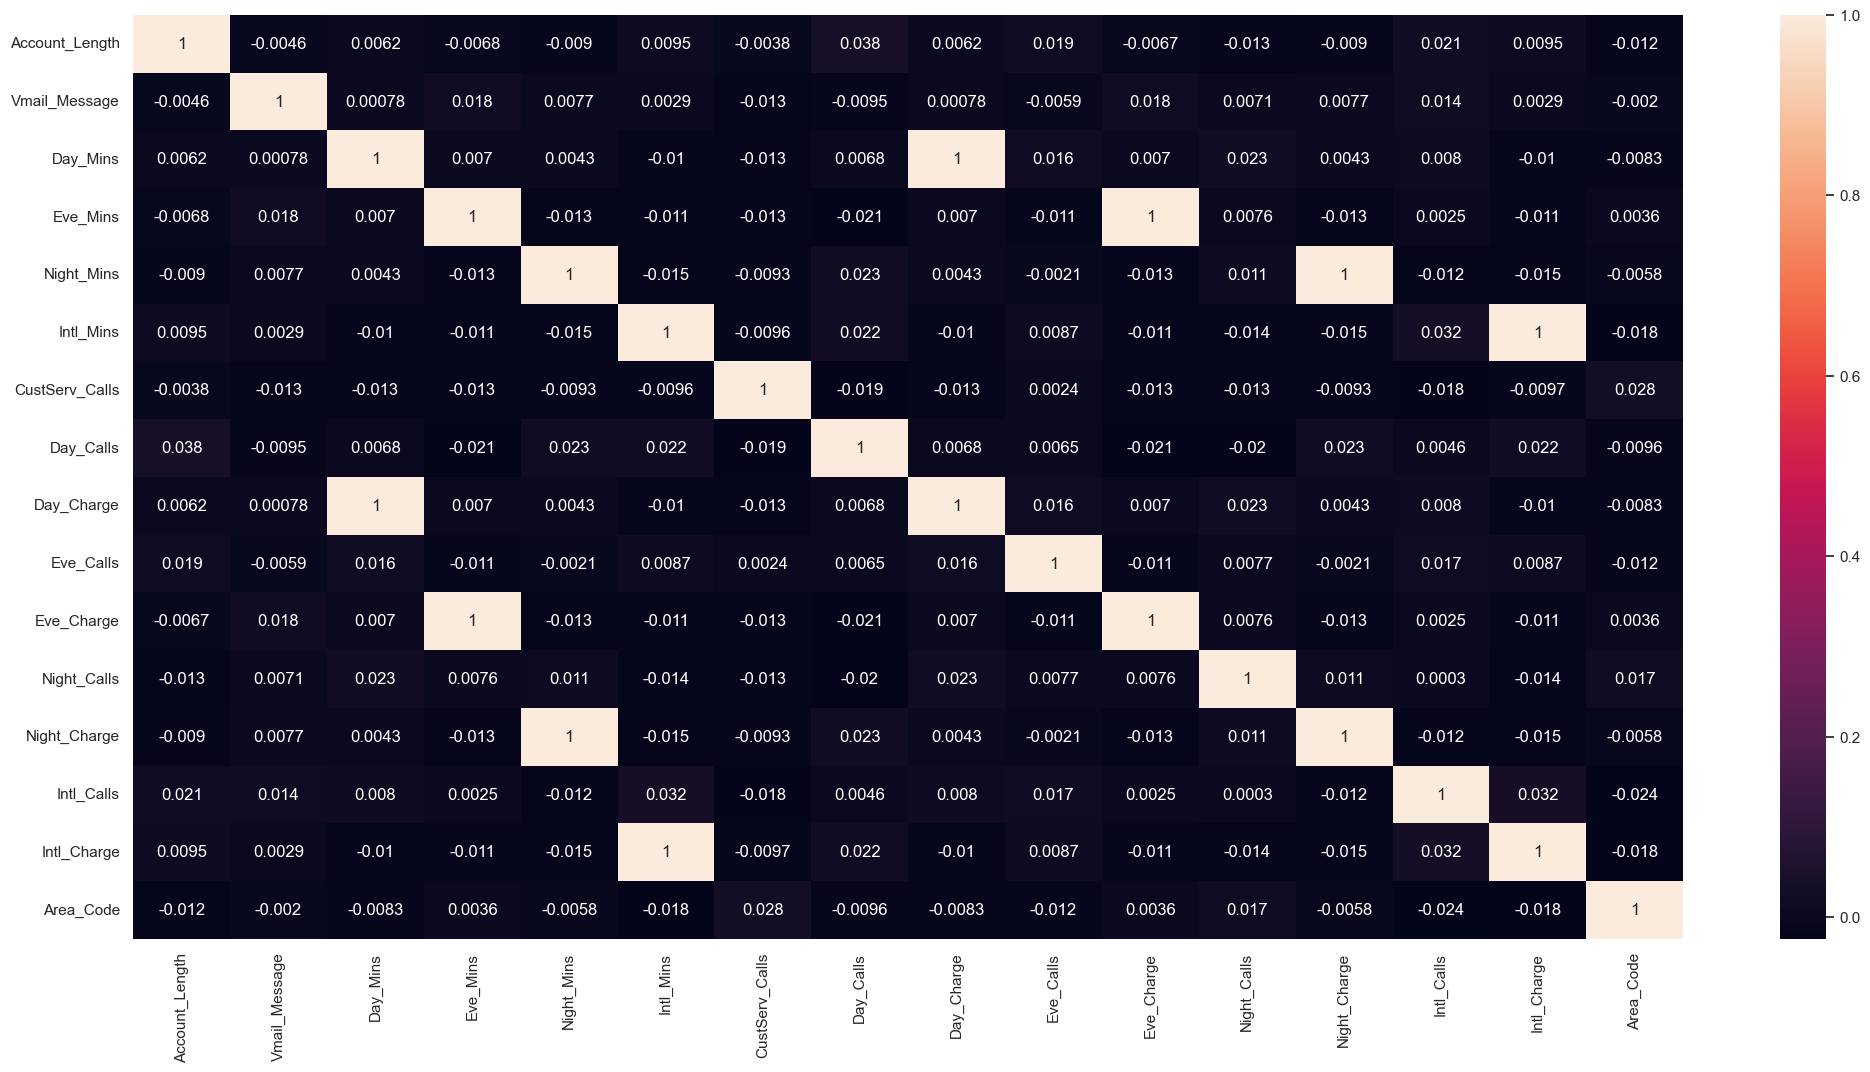

In [ ]:
correlation = num_attrib.corr( method='pearson')
sns.heatmap(correlation, annot=True);

# 5.0 Feature Selection

# 5.0 Machine Learning Models

In [ ]:
telco_target.head()

0    no
1    no
2    no
3    no
4    no
Name: Churn, dtype: object

In [ ]:
scv = SVC()
svc.fit()
svc.fit(telco_featue, telco_target)